<hr/>
[**Tolgahan Cepel**](https://www.kaggle.com/tolgahancepel)
<hr/>
<font color=green>
1. [Overview](#1)
1. [Importing Libraries and Reading the Dataset](#2)
1. [Data Visualization and Preprocessing](#3)
1. [Classification Models](#4) 
    * [Logistic Regression](#5) 
    * [K-Nearest Neighbors(K-NN)](#6)
    * [Support Vector Machine (SVM - Linear)](#7)
    * [Support Vector Machine (SVM - Kernel)](#8)
    * [Naive Bayes](#9) 
    * [Decision Tree Classification](#10) 
    * [Random Forest Classification](#11)
    * [Artificial Neural Network (ANN)](#12) 
1. [Comparing the Results](#13)
    * [Visualizing Models Performance](#14) 
1. [Conclusion](#15)
<hr/>

## <span id="1"></span> ** 1. Overview **

Columns:
- <b> RI: </b> refractive index 
- <b> NA: </b> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- <b> Mg: </b> Magnesium
- <b> Al: </b> Aluminum
- <b> K: </b> Potassium
- <b> Ca: </b> Calcium
- <b> Ba: </b> Barium
- <b> Fe: </b> Iron
- <b> Type of glass: </b> 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('../input/glass/glass.csv')
dataset.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## <span id="3"></span> ** 3. Data Visualization and Preprocessing **

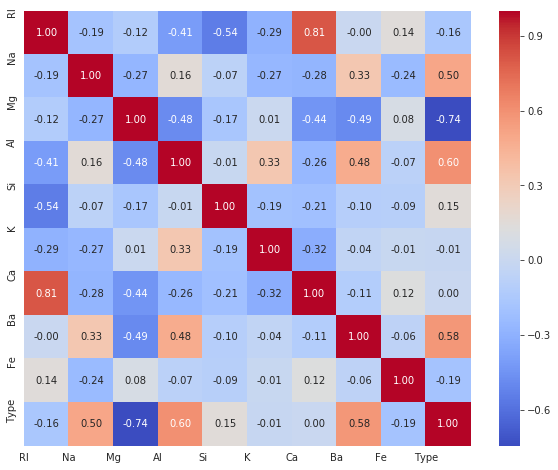

In [3]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

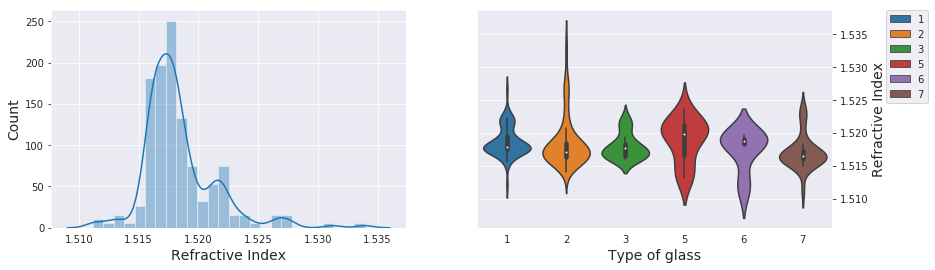

In [4]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'RI', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

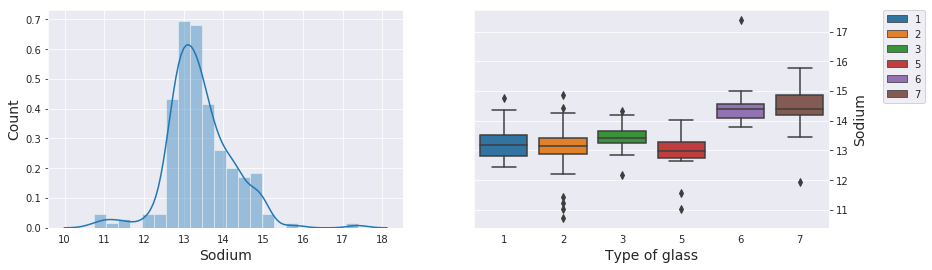

In [5]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Na', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

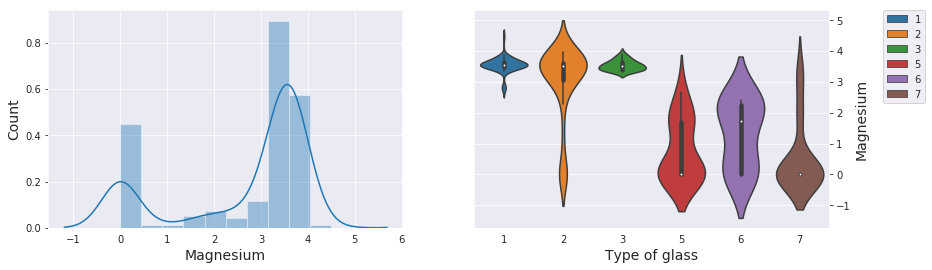

In [6]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Mg'], ax = axes[0])
axes[0].set_xlabel('Magnesium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Mg', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Magnesium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

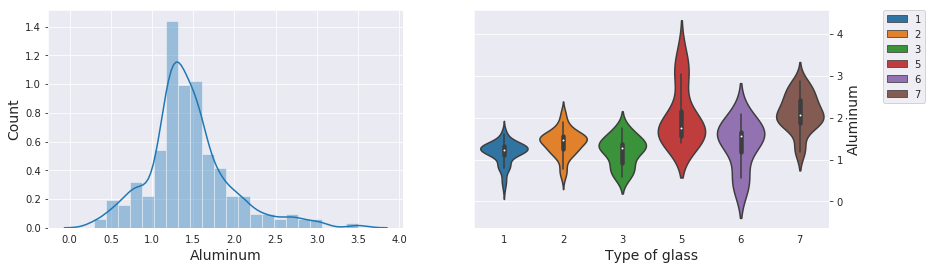

In [7]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Al'], ax = axes[0])
axes[0].set_xlabel('Aluminum', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Al', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Aluminum', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

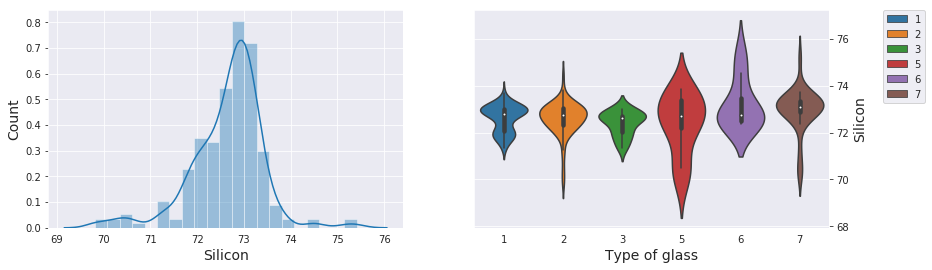

In [8]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Si'], ax = axes[0])
axes[0].set_xlabel('Silicon', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Si', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Silicon', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

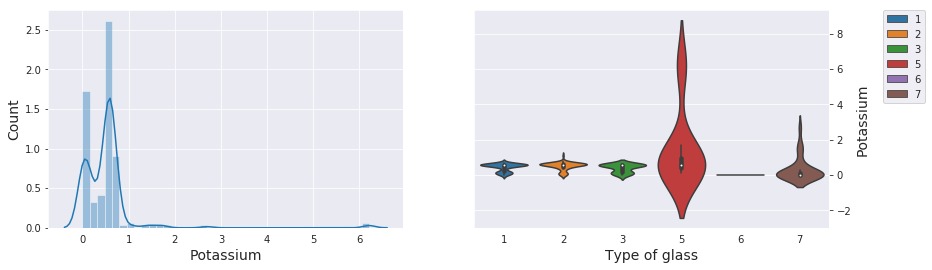

In [9]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['K'], ax = axes[0])
axes[0].set_xlabel('Potassium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'K', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Potassium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

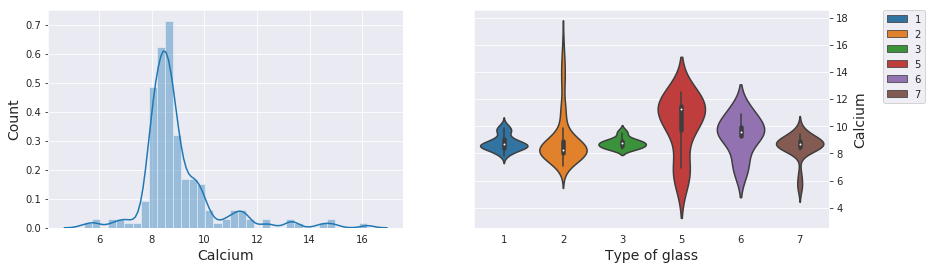

In [10]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Ca'], ax = axes[0])
axes[0].set_xlabel('Calcium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Calcium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

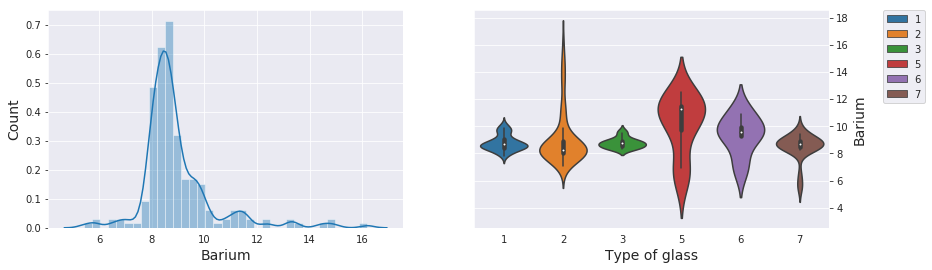

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Ca'], ax = axes[0])
axes[0].set_xlabel('Barium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Barium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

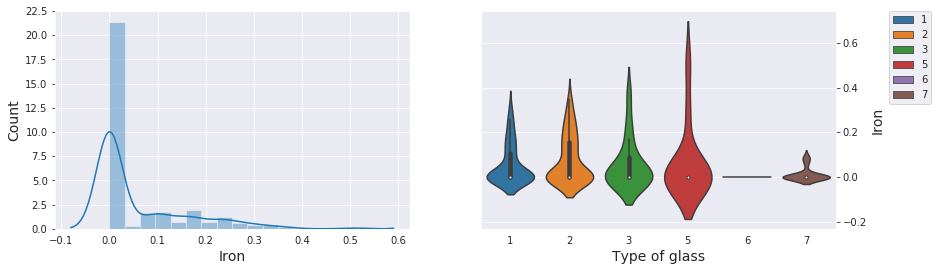

In [12]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Fe'], ax = axes[0])
axes[0].set_xlabel('Iron', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Fe', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Iron', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [13]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


## <span id="4"></span> ** 4. Classification Models **

### <span id="5"></span> ** Logistic Regression **

In [16]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())
]

lr_pipe = Pipeline(steps)

In [17]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}
classifier_lr = GridSearchCV(lr_pipe, parameters, iid=False, cv = 3)
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

In [18]:
from sklearn.metrics import accuracy_score

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("LR Accuracy: ", accuracy_lr_test)

LR Accuracy:  0.6666666666666666


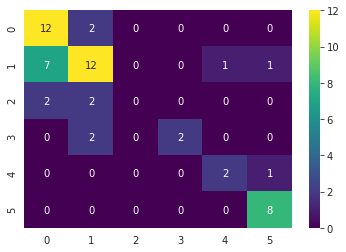

In [19]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="6"></span> ** K-Nearest Neighbors (K-NN) **

In [20]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [21]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, iid=False, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [22]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("KNN Accuracy: ", accuracy_knn_test)

KNN Accuracy:  0.7407407407407407


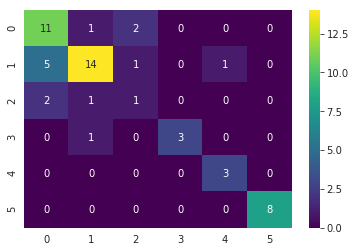

In [23]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="10"></span> ** Decision Tree Classification **

In [24]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [25]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           iid = False,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [26]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("DT Accuracy: ", accuracy_dt_test)

DT Accuracy:  0.6851851851851852


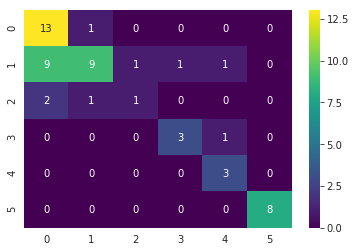

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="11"></span> ** Random Forest Classification **

In [28]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [29]:
parameters =  { "model__n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth": np.linspace(10, 110, num = 11),
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("RF Accuracy: ", accuracy_rf_test)

RF Accuracy:  0.7962962962962963


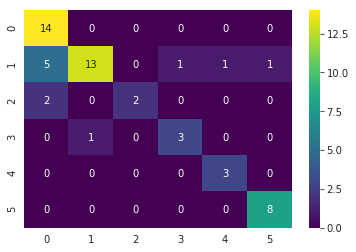

In [31]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

## <span id="13"></span> ** 5. Comparing the Results **

In [32]:
models = [('Logistic Regression', accuracy_lr_test),
          ('KNN', accuracy_knn_test),
          ('Decision Tree Classification',  accuracy_dt_test),
          ('Random Forest Classification',  accuracy_rf_test),
         ]

In [33]:
predict = pd.DataFrame(data = models, columns=['Model','Accuracy'])
predict

,Model,Accuracy
0,Logistic Regression,0.666667
1,KNN,0.740741
2,Decision Tree Classification,0.685185
3,Random Forest Classification,0.796296


### <span id="14"></span> ** Visualizing Models Performance **

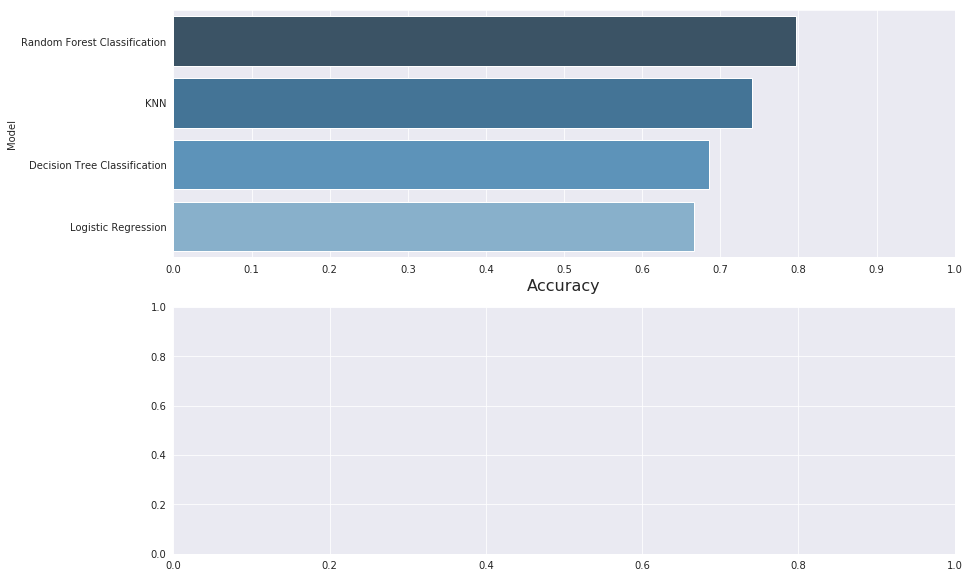

In [34]:
f, axes = plt.subplots(2, figsize=(14,10))

predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()